In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Load the DataFrame
df = pd.read_csv('datasets/train_info_dataset.csv')

### Basic Exploration of dataset

In [3]:
df.head()

,Train ID,Departure City,Arrival City,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay
0,0PS63,lONDoN pADdinGtON.,LiVERPooL liMe STREET.,2024-01-01,11:00:00,13:30:00,13:30:00,%On Time,Nan
1,A4PNQ,loNDON kingS crOsS.,yOrK.,NaN,09:45:00,11:35:00,11:40:00,Delayed!,Signal Failure
2,1HW64,liVERpoOL liME STReet.,manchEsTER PiccAdIlLy.,2024-01-02,18:15:00,18:45:00,18:45:00,!On Time,Nan
3,FLYU3,LOnDOn PaDdINgTON.,rEadiNG.,2024-01-01,21:30:00,22:30:00,22:30:00,%On Time,Nan
4,VS2ZZ,livERPoOl limE stREEt.,lOndOn EUstOn.,2024-01-01,16:45:00,19:00:00,19:00:00,*On Time,Nan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64597 entries, 0 to 64596
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Train ID             64597 non-null  object
 1   Departure City       64597 non-null  object
 2   Arrival City         64597 non-null  object
 3   Date of Journey      61353 non-null  object
 4   Departure Time       64597 non-null  object
 5   Arrival Time         64597 non-null  object
 6   Actual Arrival Time  60751 non-null  object
 7   Journey Status       64597 non-null  object
 8   Reason for Delay     64597 non-null  object
dtypes: object(9)
memory usage: 4.4+ MB


In [5]:
print(f"Num of rows {df.shape[0]} and num of columns {df.shape[1]}")
print('-------------')

print(f'Num of Null values \n{df.isna().sum()}')
print('-------------')

print(f'Num of dupluicated values {df.duplicated().sum()}')

Num of rows 64597 and num of columns 9
-------------
Num of Null values 
Train ID                  0
Departure City            0
Arrival City              0
Date of Journey        3244
Departure Time            0
Arrival Time              0
Actual Arrival Time    3846
Journey Status            0
Reason for Delay          0
dtype: int64
-------------
Num of dupluicated values 0


In [6]:
## Clean Departure City
df['Departure City'] = df['Departure City'].str.capitalize().str.replace('.','').str.split().str[0]
df['Departure City'].head()

0       London
1       London
2    Liverpool
3       London
4    Liverpool
Name: Departure City, dtype: object

In [7]:
## clear Arrival city column
df['Arrival City'] = df['Arrival City'].str.capitalize().str.rstrip('. ').str.split().str[0]
df['Arrival City'].head()

0     Liverpool
1          York
2    Manchester
3       Reading
4        London
Name: Arrival City, dtype: object

### After cleaning the departure and arrival columns, duplicate rows will appear in the dataset

In [8]:
#Display Duplicates
df.duplicated().sum()

#drop duplicate rows 
df.drop_duplicates(inplace=True)

print(f'Num of Duplicated rows: {df.duplicated().sum()}')

Num of Duplicated rows: 0


/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43119/2638739444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43119/2638739444.py:7: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(


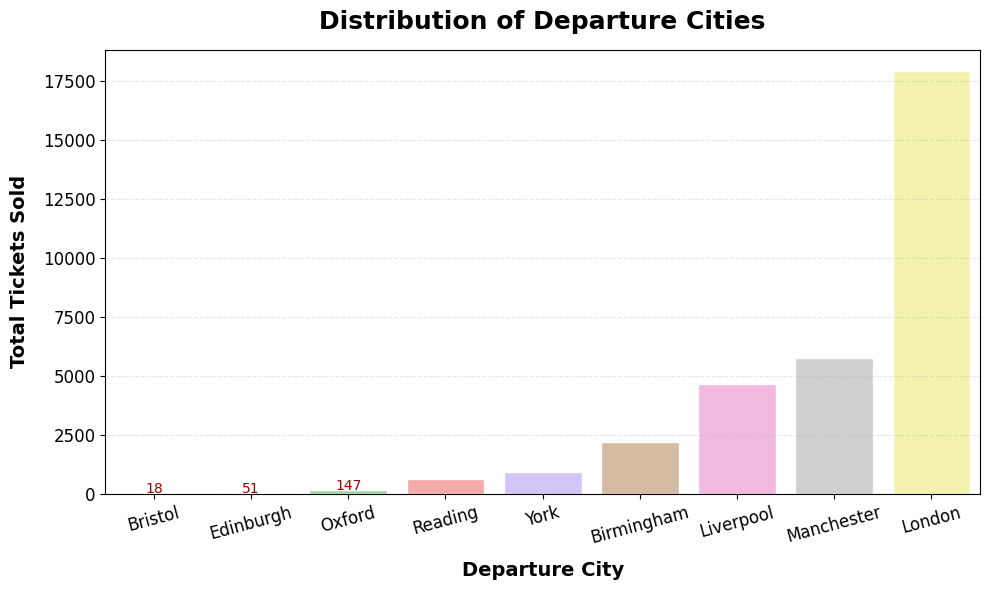

In [9]:
#Calculate Top 10 city for Depart
total_depart_city = df['Departure City'].value_counts().reset_index(name='Total').sort_values(by='Total', ascending=True)
color_palette = sns.color_palette('pastel')


plt.figure(figsize=(10,6))
sns.barplot(
    data=total_depart_city,
    x='Departure City',
    y='Total',
    palette=color_palette,
    edgecolor='white'
)

for i,row in total_depart_city.iterrows():
    if row['Total'] <500:
        plt.text(
            row['Departure City'],
            row['Total'],
            f"{row['Total']}",
            fontsize=10,
            ha='center',
            color='#990000',
            rotation=0)
        
plt.title("Distribution of Departure Cities", fontsize=18, weight='bold', pad=15)
plt.xlabel("Departure City", fontsize=14, weight='bold', labelpad=10)
plt.ylabel("Total Tickets Sold", fontsize=14, weight='bold', labelpad=10)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
#Calculate  Top 10 city for Arrival
top10_dist_arrival_city = df.groupby(by='Arrival City')['Train ID'].nunique().reset_index(name='Total').sort_values(by='Total',ascending=False).head(10)[::-1]

#Calculate  Bottom 10 city for Arrival
bottom10_dist_arrival_city = df.groupby(by='Arrival City')['Train ID'].nunique().reset_index(name='Total').sort_values(by='Total',ascending=False).tail(10)

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43119/1296783610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_dist_arrival_city,
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43119/1296783610.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43119/1296783610.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


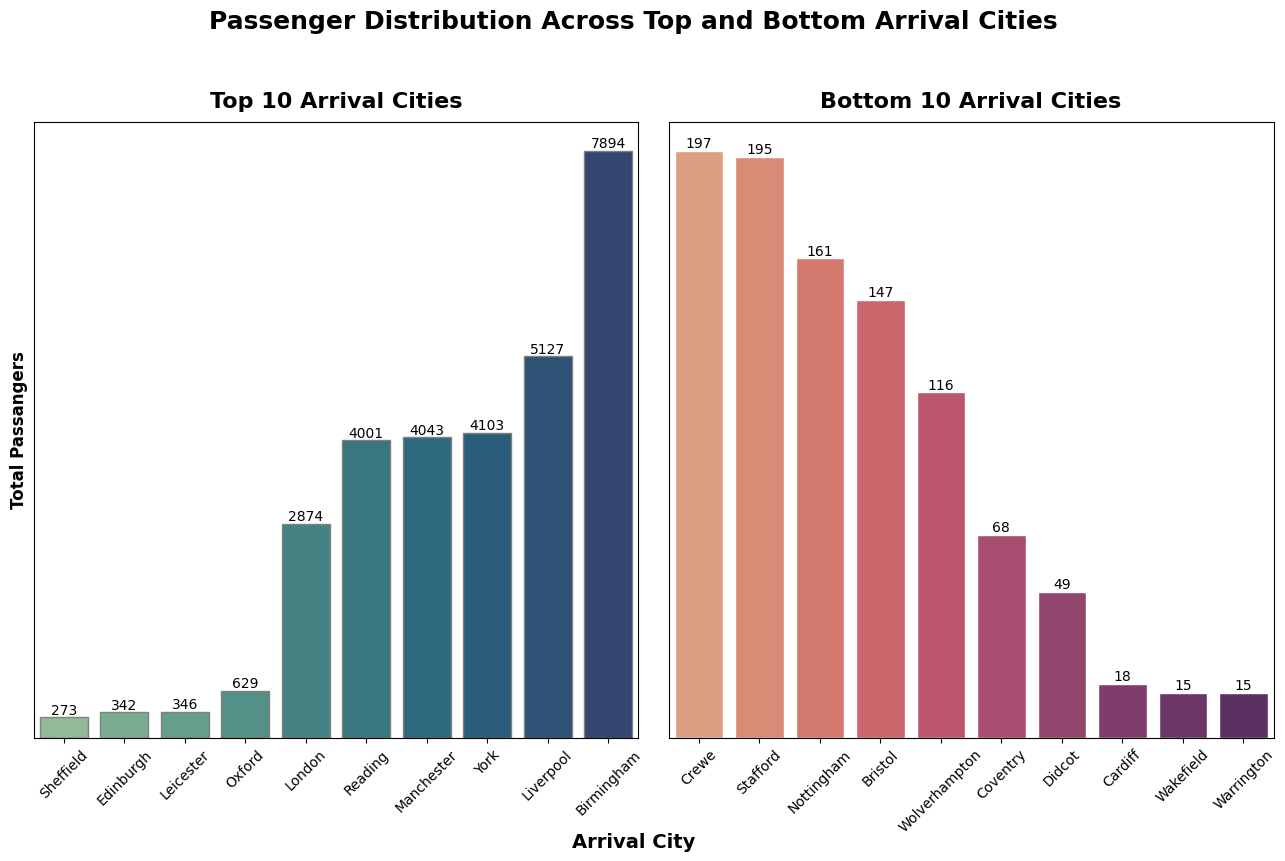

In [12]:

fig, ax = plt.subplots(1, 2, figsize=(16, 8),gridspec_kw={'wspace': 0.05})
sns.barplot(data=top10_dist_arrival_city,
            x='Arrival City',
            y='Total',
            palette='crest',
            edgecolor='grey',
            ax=ax[0])

ax[0].set_title('Top 10 Arrival Cities', fontsize=16,weight='bold', pad=10)
ax[0].set_ylabel('Total Passangers', fontsize=12,weight='bold')
ax[0].tick_params(axis='x', rotation=45,labelsize=10)
ax[0].set_xlabel(None)
ax[0].set_yticks([])
ax[0].grid(axis='y', linestyle='--', alpha=0.5)


for bar in ax[0].containers:
    ax[0].bar_label(bar,fmt='%.0f',fontsize=10)

# Second chart: Bottom 10 Arrival Cities
sns.barplot(
    data=bottom10_dist_arrival_city, 
    x='Arrival City', 
    y='Total', 
    palette='flare', 
    edgecolor='white', 
    ax=ax[1]
)
ax[1].set_title('Bottom 10 Arrival Cities', fontsize=16,weight='bold', pad=10)
ax[1].tick_params(axis='x', rotation=45,labelsize=10)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_yticks([])
ax[1].grid(axis='y', linestyle='--', alpha=0.5)



for bar in ax[1].containers:
    ax[1].bar_label(bar,fmt='%.0f', fontsize=10)


fig.text(0.5, -0.02, 'Arrival City', ha='center', va='center', fontsize=14, weight='bold')

fig.suptitle(
    'Passenger Distribution Across Top and Bottom Arrival Cities',
    fontsize=18,
    weight='bold',
    y=1.02
)
plt.tight_layout()
plt.show()

In [13]:
# delete rows where Date column has Null
df.dropna(subset=['Date of Journey'],inplace=True)
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'],format='%Y-%m-%d')


## find total trip by Day
total_trip_by_day = df.groupby([df['Date of Journey'].dt.month.rename('Month'),
     df['Date of Journey'].dt.day.rename('Day')])['Train ID'].count().reset_index(name='Amount')


total_trip_by_day.head()

,Month,Day,Amount
0,1,1,60
1,1,2,141
2,1,3,286
3,1,4,264
4,1,5,241


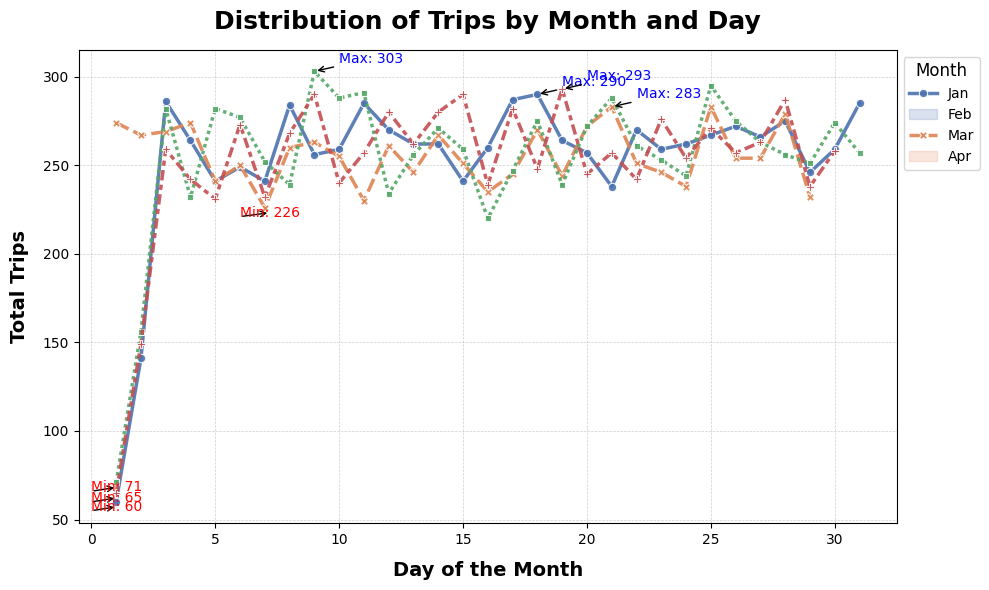

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=total_trip_by_day,
    x='Day',
    y='Amount',
    hue='Month',
    style='Month',
    linewidth=2.5,
    markers=True,
    palette='deep',
    alpha=0.9
)


for month in total_trip_by_day['Month'].unique():
    month_data = total_trip_by_day[total_trip_by_day['Month'] == month]
    
    # Find the row with the max/min'Amount'
    max_row = month_data.loc[month_data['Amount'].idxmax()]
    min_row = month_data.loc[month_data['Amount'].idxmin()]
    #Annotate to max value
    plt.annotate(
        f"Max: {max_row['Amount']}",
        xy=(max_row['Day'], max_row['Amount']),
        xytext=(max_row['Day'] + 1, max_row['Amount'] + 5),  # Adjust position
        arrowprops=dict(facecolor='black', arrowstyle="->"),
        fontsize=10,
        color='blue')
    
    #Annotate to min value
    plt.annotate(
        f'Min: {min_row["Amount"]}',
        xy=(min_row['Day']-1,min_row['Amount'] - 5),
        arrowprops=dict(facecolor='red',arrowstyle='<-'),
        fontsize=10,
        color='red'
    )


    
plt.title('Distribution of Trips by Month and Day', fontsize=18, weight='bold', pad=15)
plt.xlabel('Day of the Month', fontsize=14, weight='bold', labelpad=10)
plt.ylabel('Total Trips', fontsize=14, weight='bold', labelpad=10)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

plt.legend(
    title='Month',
    labels=['Jan','Feb','Mar','Apr'],
    title_fontsize=12,
    fontsize=10,
    loc='upper left',
    bbox_to_anchor=(1, 1),
    ncol=1
)

plt.tight_layout()
plt.show()

In [15]:
# replace special Character for clening
df['Journey Status'] = df['Journey Status'].str.replace(r'[\%\?\*\/\!\#\$\&]','',regex=True)
df['Journey Status'].head()

0    On Time
2    On Time
3    On Time
4    On Time
5    On Time
Name: Journey Status, dtype: object

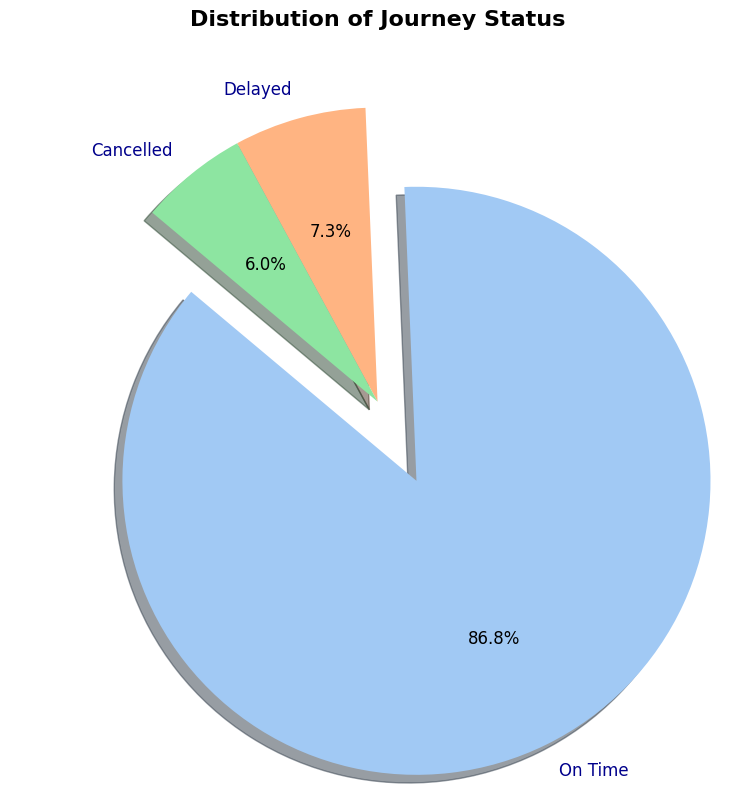

In [16]:
# find NaN values 
df.loc[df['Journey Status'] == 'Cancelled','Actual Arrival Time'] = pd.NaT

Amount_of_Jorneystatus = df['Journey Status'].value_counts()
colors = sns.color_palette("pastel")


plt.figure(figsize=(8, 8))  
wedges, texts, autotexts = plt.pie(
    Amount_of_Jorneystatus,  
    labels=Amount_of_Jorneystatus.index,  
    autopct='%1.1f%%',  
    startangle=140,  
    colors=colors,
    shadow=True,
    textprops={'fontsize': 12},
    explode=[0.3,0,0]
)

for text in texts:
    text.set_color('darkblue')
    

plt.title('Distribution of Journey Status', fontsize=16,fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
#Fill in missing values
df['Reason for Delay'] = df['Reason for Delay'].apply(lambda x: "No Delay" if x == 'Nan' else x)

In [18]:
df.rename(columns={'Train ID':'Train_ID',
                   'Departure City':'Departure_City',
                   'Arrival City':'Arrival_City',
                   'Date of Journey':'Date_of_Journey',
                   'Departure Time':'Departure_Time',
                   'Arrival Time':'Arrival_Time',
                   'Actual Arrival Time':'Actual_Arrival_Time',
                   'Journey Status':'Journey_Status',
                   'Reason for Delay':'Reason_for_Delay'},inplace=True)

In [19]:
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'],format='%Y-%m-%d').dt.date

In [20]:
df.iloc[385]

Train_ID                    OFJPG
Departure_City             London
Arrival_City           Birmingham
Date_of_Journey        2024-01-04
Departure_Time           03:45:00
Arrival_Time             05:05:00
Actual_Arrival_Time      05:05:00
Journey_Status            On Time
Reason_for_Delay         No Delay
Name: 410, dtype: object

In [21]:
#Num of rows
df.shape

(30669, 9)

## import to sql

In [22]:
from sqlalchemy import create_engine

username = "root"
password = "1234"
host = "127.0.0.1"  # or "127.0.0.1"
database = "Project"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")


table_name = "Train"
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print("DataFrame successfully imported into MySQL!")

In [23]:
df.to_csv('dataset_cleaned/Train_cleaned.csv',index=False)